# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
from citipy import citipy as cp
import requests as req
import seaborn 
from random import uniform #to be used to generate the list of 500 random lat/longs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from datetime import datetime as dt

# Import API key
from config import api_key

# Use citipy for city using lat and long
from citipy import citipy

# Range of Lat/Long
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:


#First initialize the list of lat, long coordinates
latLongList = []
cityList = []

#First quadrant
for i in range(0,1000):
    lat,long = uniform(-180,-90), uniform(-90, 90)
    latLong = (lat,long)
    latLongList.append(latLong)
    
    #Get the nearest city corresponding to these coordinates
    city = cp.nearest_city(lat, long)
    countryCity = (city.country_code,city.city_name)
    cityList.append(countryCity)

#Second quadrant
for i in range(1000,2001):
    lat,long = uniform(-90,0), uniform(-90, 90)
    latLong = (lat,long)
    latLongList.append(latLong)
    
    #Get the nearest city corresponding to these coordinates
    city = cp.nearest_city(lat, long)
    countryCity = (city.country_code,city.city_name)
    cityList.append(countryCity)   
    
for i in range(2001,3001):
    lat,long = uniform(0,90), uniform(-90, 90)
    latLong = (lat,long)
    latLongList.append(latLong)
    
    #Get the nearest city corresponding to these coordinates
    city = cp.nearest_city(lat, long)
    countryCity = (city.country_code,city.city_name)
    cityList.append(countryCity)   
    
for i in range(3001,4001):
    lat,long =  uniform(90,180), uniform(-90, 90)
    latLong = (lat,long)
    latLongList.append(latLong)
    
    #Get the nearest city corresponding to these coordinates
    city = cp.nearest_city(lat, long)
    countryCity = (city.country_code,city.city_name)
    cityList.append(countryCity)     
    
#Removing duplicate cities from the list

cityListUnique = set(cityList)
pprint (cityListUnique)

{('ae', 'abu dhabi'),
 ('af', 'dawlatabad'),
 ('af', 'mirabad'),
 ('af', 'rudbar'),
 ('af', 'sahrak'),
 ('af', 'shibarghan'),
 ('ag', 'carlisle'),
 ('ag', 'codrington'),
 ('ai', 'the valley'),
 ('am', 'tegh'),
 ('an', 'kralendijk'),
 ('ao', 'caconda'),
 ('ao', 'camabatela'),
 ('ao', 'huambo'),
 ('ao', 'luau'),
 ('ao', 'lucapa'),
 ('ao', 'namibe'),
 ('ao', 'soyo'),
 ('ar', 'bahia blanca'),
 ('ar', 'comodoro rivadavia'),
 ('ar', 'general roca'),
 ('ar', 'jujuy'),
 ('ar', 'mar del plata'),
 ('ar', 'necochea'),
 ('ar', 'neuquen'),
 ('ar', 'rawson'),
 ('ar', 'rio gallegos'),
 ('ar', 'san carlos de bariloche'),
 ('ar', 'san rafael'),
 ('ar', 'ushuaia'),
 ('ar', 'viedma'),
 ('ar', 'villa carlos paz'),
 ('at', 'bruck an der mur'),
 ('au', 'albany'),
 ('au', 'busselton'),
 ('au', 'carnarvon'),
 ('bb', 'bathsheba'),
 ('bf', 'banfora'),
 ('bg', 'krivodol'),
 ('bm', 'hamilton'),
 ('bm', 'saint george'),
 ('bo', 'riberalta'),
 ('bo', 'san jose'),
 ('bo', 'san ramon'),
 ('bo', 'trinidad'),
 ('bo', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Initilaize the dataframe that will hold the weather data for the various cities
cityWeatherList=[]


#counter to track the city and country being processed
counter = 0

#Iterate through the list of 500+ unique cities and fetch the weather data from the OpenWeatherMap API
for x in cityListUnique:
    
    #Increment the counter
    counter = counter + 1
    
    #Build OpenWeatherMap url for city
    url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&APPID=%s" % (x[1], x[0], api_key)
    
    #Hit the OpenWeatherMap API and get weather data for the city
    weather = req.get(url).json()
    
    try:
        print("# " + str(counter) + " | Getting weather for City:" + x[0] + ", " + "City Id:" + str(weather["id"]) + ", Country:" + x[1])
        print("url =" + url)
        
        #Get the required data from the openweathermap api json and put in a dictionary
        country = x[0]
        city = x[1]
        cityLat = weather["coord"]["lat"]
        cityTemp = (weather["main"]["temp_max"]  * 9/5) - 459.67
        cityWind = weather["wind"]["speed"]
        cityHumidity = weather["main"]["humidity"]
        cityCloudiness = weather["clouds"]["all"]
        cityWeatherDict = {"city":city,"country":country,"lat":cityLat,"temp":cityTemp,"wind":cityWind,"humidity":cityHumidity,"cloudiness":cityCloudiness}
       
        #Append dictionary to a list
        cityWeatherList.append(cityWeatherDict)
       
    except:
        print("Did not find weather for City:" + x[0]+ ", Country:" + x[1])


# 1 | Getting weather for City:sj, City Id:2729907, Country:longyearbyen
url =http://api.openweathermap.org/data/2.5/weather?q=longyearbyen,sj&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 2 | Getting weather for City:ru, City Id:1511646, Country:andra
url =http://api.openweathermap.org/data/2.5/weather?q=andra,ru&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 3 | Getting weather for City:gb, City Id:2647356, Country:hastings
url =http://api.openweathermap.org/data/2.5/weather?q=hastings,gb&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 4 | Getting weather for City:gy, City Id:3377301, Country:mabaruma
url =http://api.openweathermap.org/data/2.5/weather?q=mabaruma,gy&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 5 | Getting weather for City:co, City Id:3674735, Country:miraflores
url =http://api.openweathermap.org/data/2.5/weather?q=miraflores,co&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 6 | Getting weather for City:bw, City Id:933535, Country:letlhakane
url =http://api.openweathermap.org/data/2.5/weather?q=

# 56 | Getting weather for City:ml, City Id:2460546, Country:banamba
url =http://api.openweathermap.org/data/2.5/weather?q=banamba,ml&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 57 | Getting weather for City:af, City Id:1128239, Country:rudbar
url =http://api.openweathermap.org/data/2.5/weather?q=rudbar,af&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 58 | Getting weather for City:ly, City Id:2214433, Country:nalut
url =http://api.openweathermap.org/data/2.5/weather?q=nalut,ly&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 59 | Getting weather for City:br, City Id:3665315, Country:anori
url =http://api.openweathermap.org/data/2.5/weather?q=anori,br&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 60 | Getting weather for City:ne, City Id:2438855, Country:tera
url =http://api.openweathermap.org/data/2.5/weather?q=tera,ne&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 61 | Getting weather for City:ai, City Id:3573374, Country:the valley
url =http://api.openweathermap.org/data/2.5/weather?q=the valley,ai&APPID=b6291

# 107 | Getting weather for City:pt, City Id:2264557, Country:ponta do sol
url =http://api.openweathermap.org/data/2.5/weather?q=ponta do sol,pt&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 108 | Getting weather for City:cv, City Id:3374336, Country:porto novo
url =http://api.openweathermap.org/data/2.5/weather?q=porto novo,cv&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 109 | Getting weather for City:ir, City Id:124665, Country:mashhad
url =http://api.openweathermap.org/data/2.5/weather?q=mashhad,ir&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 110 | Getting weather for City:no, City Id:777019, Country:vardo
url =http://api.openweathermap.org/data/2.5/weather?q=vardo,no&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 111 | Getting weather for City:ng, City Id:2335953, Country:jos
url =http://api.openweathermap.org/data/2.5/weather?q=jos,ng&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 112 | Getting weather for City:mv, City Id:1337612, Country:dhidhdhoo
url =http://api.openweathermap.org/data/2.5/weather?q=dh

# 162 | Getting weather for City:ru, City Id:475463, Country:verkhneuralsk
url =http://api.openweathermap.org/data/2.5/weather?q=verkhneuralsk,ru&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 163 | Getting weather for City:ao, City Id:2236967, Country:soyo
url =http://api.openweathermap.org/data/2.5/weather?q=soyo,ao&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 164 | Getting weather for City:in, City Id:1263661, Country:mannarakkat
url =http://api.openweathermap.org/data/2.5/weather?q=mannarakkat,in&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 165 | Getting weather for City:br, City Id:3471451, Country:arraial do cabo
url =http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 166 | Getting weather for City:re, City Id:935255, Country:sainte-marie
url =http://api.openweathermap.org/data/2.5/weather?q=sainte-marie,re&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 167 | Getting weather for City:ru, City Id:583041, Country:aleksandrovsk
url =http://api.o

# 212 | Getting weather for City:is, City Id:2629833, Country:husavik
url =http://api.openweathermap.org/data/2.5/weather?q=husavik,is&APPID=b62910e056d15d38dec5b12c5a6f6e64
Did not find weather for City:br, Country:guapore
# 214 | Getting weather for City:mz, City Id:1028918, Country:pemba
url =http://api.openweathermap.org/data/2.5/weather?q=pemba,mz&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 215 | Getting weather for City:ru, City Id:523392, Country:naryan-mar
url =http://api.openweathermap.org/data/2.5/weather?q=naryan-mar,ru&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 216 | Getting weather for City:na, City Id:3353811, Country:otjiwarongo
url =http://api.openweathermap.org/data/2.5/weather?q=otjiwarongo,na&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 217 | Getting weather for City:cl, City Id:3868210, Country:vilcun
url =http://api.openweathermap.org/data/2.5/weather?q=vilcun,cl&APPID=b62910e056d15d38dec5b12c5a6f6e64
Did not find weather for City:py, Country:doctor pedro p. pena
# 219 | Ge

# 263 | Getting weather for City:ng, City Id:2345521, Country:damaturu
url =http://api.openweathermap.org/data/2.5/weather?q=damaturu,ng&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 264 | Getting weather for City:mu, City Id:1106643, Country:quatre cocos
url =http://api.openweathermap.org/data/2.5/weather?q=quatre cocos,mu&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 265 | Getting weather for City:cn, City Id:1280849, Country:kashi
url =http://api.openweathermap.org/data/2.5/weather?q=kashi,cn&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 266 | Getting weather for City:ru, City Id:1486321, Country:yar-sale
url =http://api.openweathermap.org/data/2.5/weather?q=yar-sale,ru&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 267 | Getting weather for City:gm, City Id:2413753, Country:brufut
url =http://api.openweathermap.org/data/2.5/weather?q=brufut,gm&APPID=b62910e056d15d38dec5b12c5a6f6e64
Did not find weather for City:br, Country:formoso do araguaia
# 269 | Getting weather for City:cl, City Id:3893726, Countr

Did not find weather for City:gl, Country:illoqqortoormiut
# 315 | Getting weather for City:bo, City Id:3902377, Country:trinidad
url =http://api.openweathermap.org/data/2.5/weather?q=trinidad,bo&APPID=b62910e056d15d38dec5b12c5a6f6e64
Did not find weather for City:in, Country:paradwip
# 317 | Getting weather for City:ca, City Id:6165406, Country:thompson
url =http://api.openweathermap.org/data/2.5/weather?q=thompson,ca&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 318 | Getting weather for City:br, City Id:3448903, Country:sao joao da barra
url =http://api.openweathermap.org/data/2.5/weather?q=sao joao da barra,br&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 319 | Getting weather for City:lr, City Id:2274275, Country:robertsport
url =http://api.openweathermap.org/data/2.5/weather?q=robertsport,lr&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 320 | Getting weather for City:tj, City Id:1220826, Country:farkhor
url =http://api.openweathermap.org/data/2.5/weather?q=farkhor,tj&APPID=b62910e056d15d38dec5b

# 363 | Getting weather for City:pk, City Id:1180729, Country:dalbandin
url =http://api.openweathermap.org/data/2.5/weather?q=dalbandin,pk&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 364 | Getting weather for City:cn, City Id:1529651, Country:altay
url =http://api.openweathermap.org/data/2.5/weather?q=altay,cn&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 365 | Getting weather for City:ao, City Id:3347019, Country:namibe
url =http://api.openweathermap.org/data/2.5/weather?q=namibe,ao&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 366 | Getting weather for City:cd, City Id:209598, Country:manono
url =http://api.openweathermap.org/data/2.5/weather?q=manono,cd&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 367 | Getting weather for City:br, City Id:3466980, Country:caravelas
url =http://api.openweathermap.org/data/2.5/weather?q=caravelas,br&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 368 | Getting weather for City:it, City Id:2524928, Country:corleone
url =http://api.openweathermap.org/data/2.5/weather?q=corleo

# 416 | Getting weather for City:za, City Id:1006984, Country:east london
url =http://api.openweathermap.org/data/2.5/weather?q=east london,za&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 417 | Getting weather for City:mu, City Id:933995, Country:souillac
url =http://api.openweathermap.org/data/2.5/weather?q=souillac,mu&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 418 | Getting weather for City:ru, City Id:466258, Country:yuryevets
url =http://api.openweathermap.org/data/2.5/weather?q=yuryevets,ru&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 419 | Getting weather for City:in, City Id:1267904, Country:narsimhapur
url =http://api.openweathermap.org/data/2.5/weather?q=narsimhapur,in&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 420 | Getting weather for City:ar, City Id:3855065, Country:general roca
url =http://api.openweathermap.org/data/2.5/weather?q=general roca,ar&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 421 | Getting weather for City:tr, City Id:303290, Country:ortakoy
url =http://api.openweathermap.

# 468 | Getting weather for City:cz, City Id:3078513, Country:buchlovice
url =http://api.openweathermap.org/data/2.5/weather?q=buchlovice,cz&APPID=b62910e056d15d38dec5b12c5a6f6e64
Did not find weather for City:co, Country:cumaribo
# 470 | Getting weather for City:cn, City Id:1790885, Country:changji
url =http://api.openweathermap.org/data/2.5/weather?q=changji,cn&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 471 | Getting weather for City:co, City Id:3678000, Country:la primavera
url =http://api.openweathermap.org/data/2.5/weather?q=la primavera,co&APPID=b62910e056d15d38dec5b12c5a6f6e64
Did not find weather for City:sd, Country:bentiu
# 473 | Getting weather for City:tc, City Id:3576994, Country:cockburn town
url =http://api.openweathermap.org/data/2.5/weather?q=cockburn town,tc&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 474 | Getting weather for City:ng, City Id:2339937, Country:gusau
url =http://api.openweathermap.org/data/2.5/weather?q=gusau,ng&APPID=b62910e056d15d38dec5b12c5a6f6e64
Did no

# 524 | Getting weather for City:us, City Id:4251141, Country:taylorville
url =http://api.openweathermap.org/data/2.5/weather?q=taylorville,us&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 525 | Getting weather for City:za, City Id:962367, Country:richards bay
url =http://api.openweathermap.org/data/2.5/weather?q=richards bay,za&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 526 | Getting weather for City:ve, City Id:3645532, Country:ciudad bolivar
url =http://api.openweathermap.org/data/2.5/weather?q=ciudad bolivar,ve&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 527 | Getting weather for City:se, City Id:2686657, Country:orebro
url =http://api.openweathermap.org/data/2.5/weather?q=orebro,se&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 528 | Getting weather for City:es, City Id:2513595, Country:montoro
url =http://api.openweathermap.org/data/2.5/weather?q=montoro,es&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 529 | Getting weather for City:gl, City Id:3420768, Country:qasigiannguit
url =http://api.openweath

# 573 | Getting weather for City:ao, City Id:2242885, Country:camabatela
url =http://api.openweathermap.org/data/2.5/weather?q=camabatela,ao&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 574 | Getting weather for City:gl, City Id:3424901, Country:aasiaat
url =http://api.openweathermap.org/data/2.5/weather?q=aasiaat,gl&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 575 | Getting weather for City:gl, City Id:3418910, Country:upernavik
url =http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 576 | Getting weather for City:cd, City Id:217831, Country:bukavu
url =http://api.openweathermap.org/data/2.5/weather?q=bukavu,cd&APPID=b62910e056d15d38dec5b12c5a6f6e64
Did not find weather for City:kz, Country:kirovskiy
# 578 | Getting weather for City:sa, City Id:105299, Country:jizan
url =http://api.openweathermap.org/data/2.5/weather?q=jizan,sa&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 579 | Getting weather for City:gl, City Id:3421765, Country:nanortalik
url

# 624 | Getting weather for City:bw, City Id:933815, Country:dekar
url =http://api.openweathermap.org/data/2.5/weather?q=dekar,bw&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 625 | Getting weather for City:ml, City Id:2450173, Country:taoudenni
url =http://api.openweathermap.org/data/2.5/weather?q=taoudenni,ml&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 626 | Getting weather for City:ru, City Id:1489853, Country:tazovskiy
url =http://api.openweathermap.org/data/2.5/weather?q=tazovskiy,ru&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 627 | Getting weather for City:br, City Id:3445853, Country:ubaitaba
url =http://api.openweathermap.org/data/2.5/weather?q=ubaitaba,br&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 628 | Getting weather for City:co, City Id:3675504, Country:manaure
url =http://api.openweathermap.org/data/2.5/weather?q=manaure,co&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 629 | Getting weather for City:gq, City Id:2309528, Country:luba
url =http://api.openweathermap.org/data/2.5/weather?q=luba

# 674 | Getting weather for City:es, City Id:2517750, Country:felanitx
url =http://api.openweathermap.org/data/2.5/weather?q=felanitx,es&APPID=b62910e056d15d38dec5b12c5a6f6e64
Did not find weather for City:pk, Country:thano bula khan
# 676 | Getting weather for City:br, City Id:3445782, Country:umuarama
url =http://api.openweathermap.org/data/2.5/weather?q=umuarama,br&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 677 | Getting weather for City:ar, City Id:3843123, Country:neuquen
url =http://api.openweathermap.org/data/2.5/weather?q=neuquen,ar&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 678 | Getting weather for City:cd, City Id:923058, Country:kambove
url =http://api.openweathermap.org/data/2.5/weather?q=kambove,cd&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 679 | Getting weather for City:ne, City Id:2440371, Country:ouallam
url =http://api.openweathermap.org/data/2.5/weather?q=ouallam,ne&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 680 | Getting weather for City:cl, City Id:3899695, Country:ancud
u

# 728 | Getting weather for City:id, City Id:1633419, Country:padang
url =http://api.openweathermap.org/data/2.5/weather?q=padang,id&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 729 | Getting weather for City:br, City Id:3393692, Country:itarema
url =http://api.openweathermap.org/data/2.5/weather?q=itarema,br&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 730 | Getting weather for City:br, City Id:3397763, Country:jacareacanga
url =http://api.openweathermap.org/data/2.5/weather?q=jacareacanga,br&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 731 | Getting weather for City:br, City Id:3406202, Country:barreirinha
url =http://api.openweathermap.org/data/2.5/weather?q=barreirinha,br&APPID=b62910e056d15d38dec5b12c5a6f6e64
# 732 | Getting weather for City:eg, City Id:361058, Country:alexandria
url =http://api.openweathermap.org/data/2.5/weather?q=alexandria,eg&APPID=b62910e056d15d38dec5b12c5a6f6e64


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cityWeatherdf = pd.DataFrame(cityWeatherList) 
cityWeatherdf.to_csv("Output/CityWeather_Results.csv")
print(cityWeatherdf)

                    city  cloudiness country  humidity    lat     temp   wind
0           longyearbyen          40      sj        64  78.22   1.4000   2.60
1                  andra          88      ru        81  62.52  17.5838   2.85
2               hastings          75      gb        93  50.86  57.0020   8.70
3               mabaruma          64      gy        70   8.20  82.4738   3.90
4             miraflores          92      co       100   5.20  53.8088   1.05
5             letlhakane          24      bw        25 -21.42  96.5588   1.30
6                  matay           0      eg        26  28.42  69.6020   4.10
7            abong mbang          56      cm        62   3.98  82.0238   0.50
8                 pishin          92      pk       100  30.58  36.6188   1.30
9             chapayevka          68      ua        62  47.47  30.8138   6.15
10            banda aceh          80      id        86   5.56  79.2338   1.60
11                hwange          24      zw        32 -18.35  9

In [5]:
cityWeatherdf.head()

,city,cloudiness,country,humidity,lat,temp,wind
0,longyearbyen,40,sj,64,78.22,1.4000,2.60
1,andra,88,ru,81,62.52,17.5838,2.85
2,hastings,75,gb,93,50.86,57.0020,8.70
3,mabaruma,64,gy,70,8.20,82.4738,3.90
4,miraflores,92,co,100,5.20,53.8088,1.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

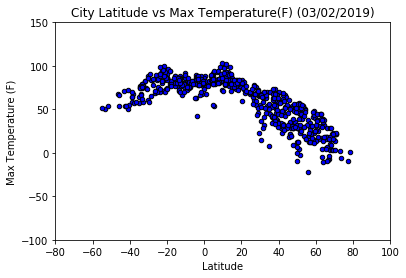

In [6]:
plt.title("City Latitude vs Max Temperature(F) " + dt.now().strftime("(%m/%d/%Y)"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(cityWeatherdf["lat"],cityWeatherdf["temp"], marker = "o", edgecolors = "k",
            s=20, c="b",alpha=1.0,linewidth = 1 )
        
plt.xticks([-80,-60,-40,-20,0, 20,40,60,80,100])
plt.yticks([-100,-50,0,50,100,150])
plt.savefig("LatvsMaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

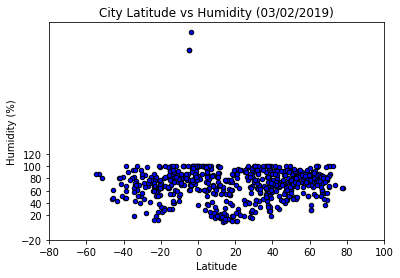

In [7]:
plt.title("City Latitude vs Humidity " + dt.now().strftime("(%m/%d/%Y)"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(cityWeatherdf["lat"],cityWeatherdf["humidity"], marker = "o", edgecolors = "k",
            s=20, c="b",alpha=1.0,linewidth = 1 )
    
plt.xticks([-80,-60,-40,-20,0, 20,40,60,80,100])
plt.yticks([-20,20,40,60,80,100,120])
plt.savefig("LatvsHumidity.png")
plt.show()  

#### Latitude vs. Cloudiness Plot

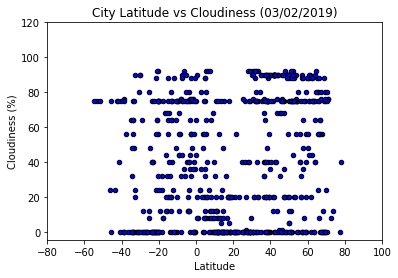

In [8]:
plt.title("City Latitude vs Cloudiness " + dt.now().strftime("(%m/%d/%Y)"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(cityWeatherdf["lat"],cityWeatherdf["cloudiness"], marker = "o", edgecolors = "k",
            s=20, c="b",alpha=1.0,linewidth = 1 )
    
plt.xticks([-80,-60,-40,-20,0, 20,40,60,80,100])
plt.yticks([0,20,40,60,80,100,120])
plt.savefig("LatvsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

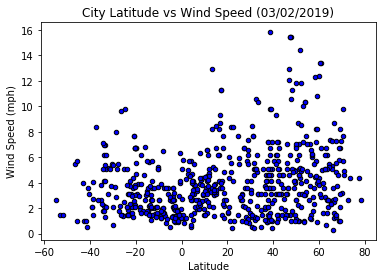

In [9]:
plt.title("City Latitude vs Wind Speed " + dt.now().strftime("(%m/%d/%Y)"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(cityWeatherdf["lat"],cityWeatherdf["wind"], marker = "o", edgecolors = "k",
            s=20, c="b",alpha=1.0,linewidth = 1 )
    
#plt.xticks([-80,-60,-40,-20,0, 20,40,60,80,100])
#plt.yticks([-20,20,40,60,80,100,120])
plt.savefig("LatvsWindSpeed.png")
plt.show() 